In [1]:
import numpy as np
import pandas as pd
import wrangle_project
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import prepare

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

df, train, validate, test = wrangle_project.wrangle_zillow()
df, train, validate, test = wrangle1.wrangle_zillow()
train_scaled, validate_scaled, test_scaled = prepare.scale_data_project(train, validate, test)


In [2]:
df, train, validate, test = wrangle_project.wrangle_zillow()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50851 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bed        50851 non-null  float64
 1   bath       50851 non-null  float64
 2   sqft       50851 non-null  float64
 3   tax_value  50851 non-null  float64
 4   yearbuilt  50851 non-null  float64
 5   zip        50851 non-null  float64
dtypes: float64(6)
memory usage: 2.7 MB


In [4]:
x_tr = train.drop(columns=['tax_value'])
y_tr = train.tax_value

x_val = validate.drop(columns=['tax_value'])
y_val = validate.tax_value

x_test = test.drop(columns=['tax_value'])
y_test = test.tax_value

# Assingment

   1. Select a dataset with a continuous target variable. 
       - Done above, selected Zillow and updated wrangle so that these exercises are done with the final project in mind. 
       
       
   2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.
       - Done above.
       

   3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data. 
       - Below
           -baseline part of assignment starts at cell 20
   
  


In [5]:
#get to know your data set shapes!

(array([9339., 9175., 5167., 2350., 1032.,  614.,  401.,  254.,  121.,
          23.]),
 array([1.0000000e+03, 2.4281720e+05, 4.8463440e+05, 7.2645160e+05,
        9.6826880e+05, 1.2100860e+06, 1.4519032e+06, 1.6937204e+06,
        1.9355376e+06, 2.1773548e+06, 2.4191720e+06]),
 <BarContainer object of 10 artists>)

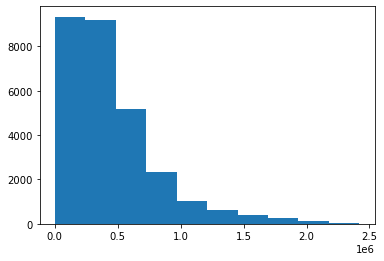

In [6]:
plt.hist(y_tr) 

In [7]:
cols = x_tr.columns
cols

Index(['bed', 'bath', 'sqft', 'yearbuilt', 'zip'], dtype='object')

(array([  320.,     0.,  4616.,     0., 12934.,     0.,  8314.,     0.,
         2015.,   277.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

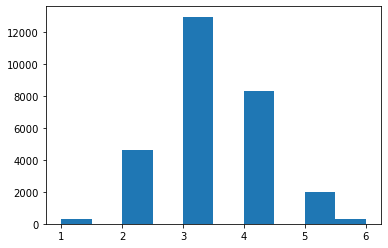

In [8]:
plt.hist(x_tr.bed)

bed


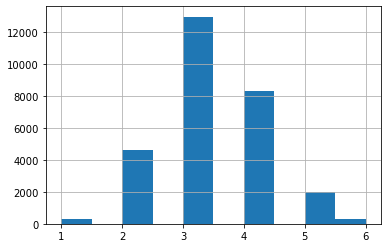

bath


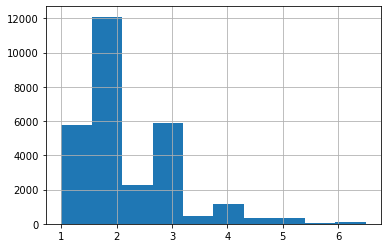

sqft


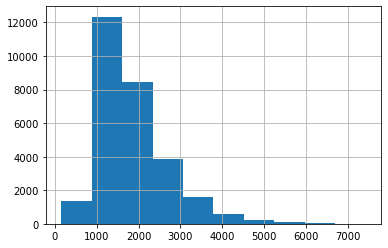

yearbuilt


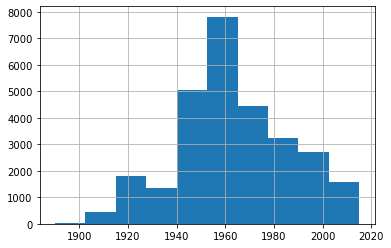

zip


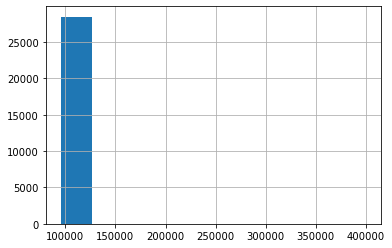

In [9]:
for col in cols:
    print(col)
    x_tr[col].hist()
    plt.show()

    #OR

# for col in cols:
#     print(col)
#     plt.hist(x_tr[col])
#     plt.show()

In [10]:
# bath and zip aren't great. the rest are fairly gaussian-ish.

In [11]:
l = pd.DataFrame(x_tr.zip.value_counts())
l.head(3)

,zip
97319.0,448
97318.0,387
97329.0,337


In [12]:
l.shape

(375, 1)

(array([125., 126.,  76.,  32.,   9.,   2.,   2.,   1.,   1.,   1.]),
 array([  1. ,  45.7,  90.4, 135.1, 179.8, 224.5, 269.2, 313.9, 358.6,
        403.3, 448. ]),
 <BarContainer object of 10 artists>)

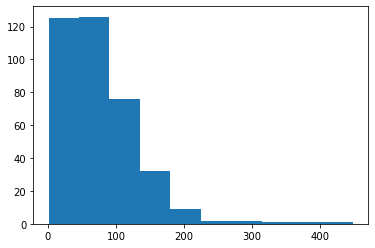

In [13]:
plt.hist(l)

In [14]:
l

,zip
97319.0,448
97318.0,387
97329.0,337
97328.0,287
97118.0,275
...,...
96226.0,2
96434.0,2
96323.0,1
96289.0,1


# Scale the data

In [15]:
train_scaled, validate_scaled, test_scaled = prepare.scale_data_project(train, validate, test)

In [16]:
train_scaled.head(3)

,bed,bath,sqft,tax_value,yearbuilt,zip
7613,4.0,2.5,0.250343,263450.0,1979.0,97097.0
37268,2.0,1.0,0.111508,160220.0,1940.0,96986.0
47769,4.0,2.0,0.191431,477466.0,1973.0,96985.0


In [17]:
x_tr_s = train_scaled.drop(columns=['tax_value'])
y_tr_s = train_scaled.tax_value

x_val_s = validate_scaled.drop(columns=['tax_value'])
y_val_s = validate_scaled.tax_value

x_test_s = test_scaled.drop(columns=['tax_value'])
y_test_s = test_scaled.tax_value

<font style="font-size:40px" color='red'>Dear Grader</font>

### the following are my notes on models. Please scroll to "assignment continued" cell

### Data good to go, lets review models!!

# Overview of models


For a normally distributed y and a linear relationship: OLS, LassoLars, GLM(power=0) will work best.

For polynomial relationships, polynomial regression is best.

For poisson, gamma or inverse gaussian distributions, use the Generalize Linear Model.


# OLS

![Screen%20Shot%202022-07-24%20at%206.42.41%20PM.png]
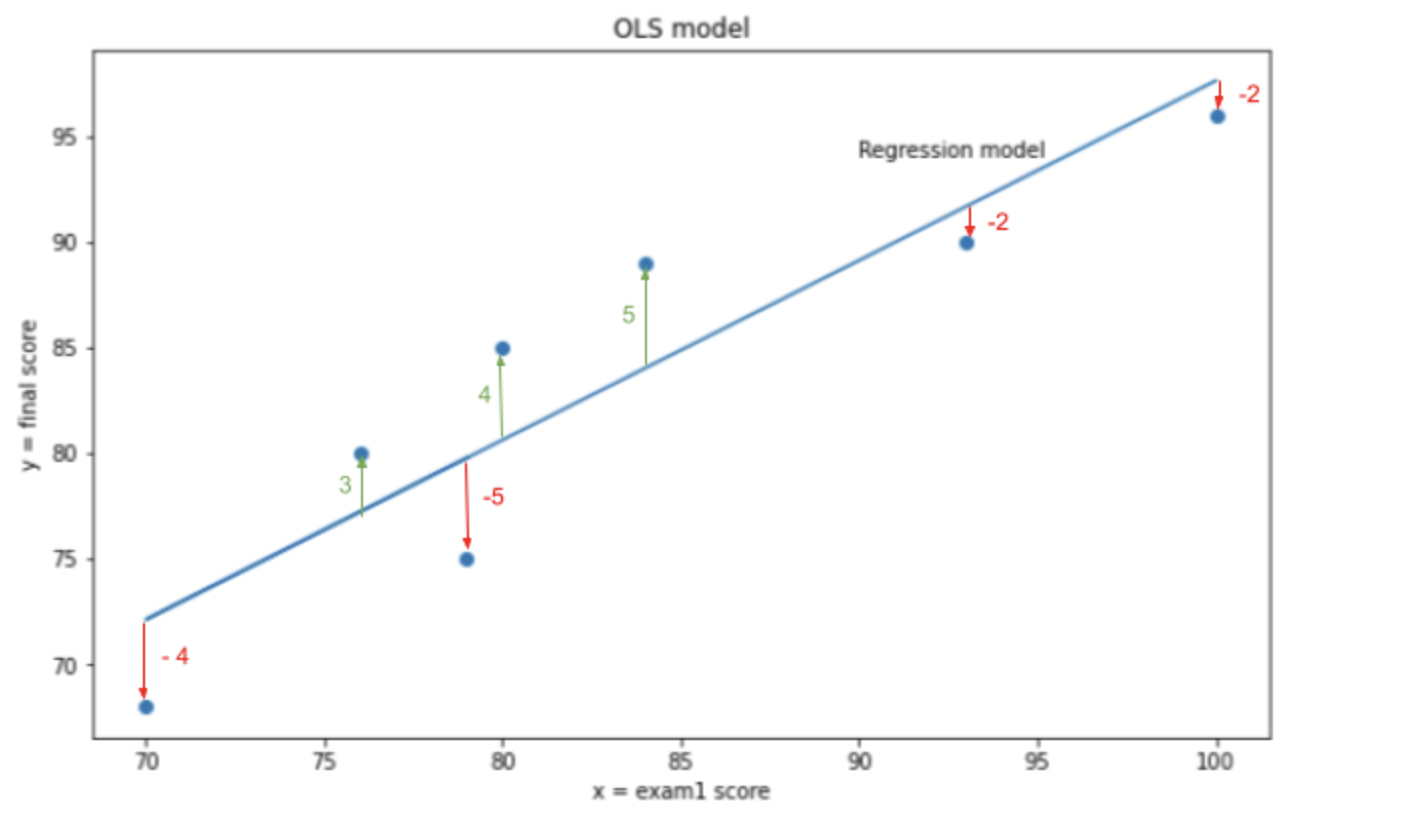


### Aim to minimize the RSME of the residualas (the numbers showing the distance from the line to the acutal data)

![Screen%20Shot%202022-07-24%20at%206.51.20%20PM.png]
<div>
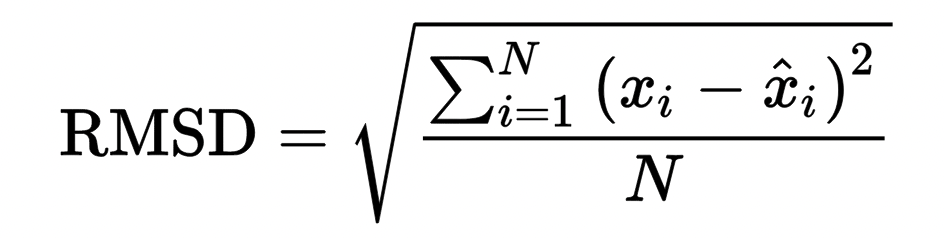
</div>


### NOT to be confused with R^2
### R^2 is how tightly the data fits the line in percentage and is calculated 


![Screen%20Shot%202022-07-24%20at%206.50.07%20PM.png]
<div>
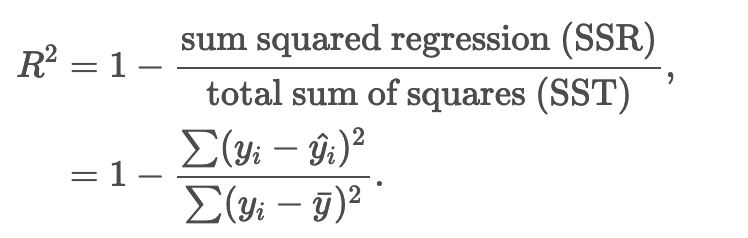
</div>

# LASSO Least Absolute Shrinkage and Selection Operator

![Screen%20Shot%202022-07-24%20at%207.09.59%20PM.png
<div>
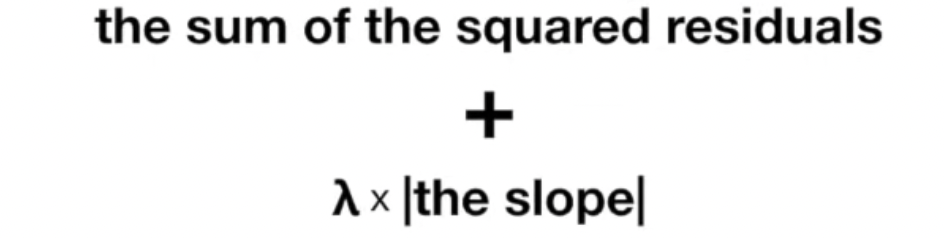
</div>

From youtube:
https://www.youtube.com/watch?v=NGf0voTMlcs&t=301s

From curiculum:
α=0 is basically the OLS algorithm.

α∈[0,∞]

Higher α will be more robust to collinearity between features.

As α increases, it will reach a point where performance in the model no longer changes. The fewer the features, the lower the value of α will be when you reach that point.

α=1 is a good starting point. 

# LARS = Least Angle Regression

from wiki:

The basic steps of the Least-angle regression algorithm are:

- Start with all coefficients β equal to zero.
- Find the predictor x_sub_j most correlated with y
- Increase the coefficient β_j in the direction of the sign of its correlation with y. 
- Take residuals r = y − y_hat along the way. Stop when some other predictor x_k has as much correlation with r as   x_j has.
- Increase (β_j, β_k) in their joint least squares direction, until some other predictor x_m has as much             correlation with the residual r.
- Increase (β_j, β_k, β_m) in their joint least squares direction, until some other predictor x_n has as much         correlation with the residual.
- Continue until: all predictors are in the model

pros and cons

The advantages of the LARS method are:

   - It is computationally just as fast as forward selection.
   - It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.
   - If two variables are almost equally correlated with the response, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.
   - It is easily modified to produce efficient algorithms for other methods producing similar results, like the lasso and forward stagewise regression.
   - It is effective in contexts where p >> n (i.e., when the number of predictors p is significantly greater than the number of points n)[2]

The disadvantages of the LARS method include:

    1. With any amount of noise in the dependent variable and with high dimensional multicollinear independent variables, there is no reason to believe that the selected variables will have a high probability of being the actual underlying causal variables. This problem is not unique to LARS, as it is a general problem with variable selection approaches that seek to find underlying deterministic components. Yet, because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.[3] Weisberg provides an empirical example based upon re-analysis of data originally used to validate LARS that the variable selection appears to have problems with highly correlated variables.
    2. Since almost all high dimensional data in the real world will just by chance exhibit some fair degree of collinearity across at least some variables, the problem that LARS has with correlated variables may limit its application to high dimensional data.

# Polynomial Regression

Just like an ordinary linear model, but where the features are polynomial. So we create polynomial features first using the PolynomialFeatures method, and then fit a model using our new transformed features using any of the linear models, such as LinearRegression

Steps:

    Transform the features, with the hyperparameter degree representing the expected shape of the relationship between the features (X) and the target variable (y). It will usually be a 2 or 3, meaning a 2nd or 3rd degree polynomial. Values over that are likely to lead to overfitting.

    sklearn.preprocessing.PolynomialFeatures(degree=2)


# Generalized Linear Model

The most flexible regression algorithm, the GLM allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO). We will use the TweedieRegressor2 method to create a GLM using sklearn.

    sklearn.linear_model.TweedieRegressor(power=0, alpha=1.0)

About power
    power = 0: Normal Distribution\
    power = 1: Poisson Distribution\
    power = (1,2): Compound Distribution\
    power = 2: Gamma Distribution\
    power = 3: Inverse Gaussian Distribution


# ASSIGNMENT CONTINUED




<font style="font-size:40px" color='blue'>ASSIGNMENT CONTINUED</font>




In [18]:
# back to data

In [19]:
#Variables already defined from above:

df, train, validate, test

train_scaled, validate_scaled, test_scaled

x_tr \ 
y_tr 

x_val \ 
y_val 

x_test \ 
y_test 

x_tr_s / 
y_tr_s 

x_val_s / 
y_val_s 

x_test_s / 
y_test_s 

# Baseline

Running through curriculum code for baseline

From curriculum

    Predict all final grades to be 10.52, which is equal to the mean of G3 for the training sample. Store in y_train['G3_pred_mean'].

    Predict all final grades to be 11, which is equal to the median of G3 for the training sample. Store in y_train['G3_pred_median'].

    Compute the RMSE comparing actual final grade (G3) to G3_pred_mean.

    Compute the RMSE comparing actual final grade (G3) to G3_pred_median.


In [20]:
predictions_tr = pd.DataFrame({
    'actual_tr': train_scaled.tax_value
}) 

In [21]:
predictions_tr['baseline_mean'] = y_tr_s.mean()

In [22]:
predictions_tr['baseline_median'] = y_tr_s.median()

In [23]:
predictions_tr.head(3)

,actual_tr,baseline_mean,baseline_median
7613,263450.0,450433.891558,365114.0
37268,160220.0,450433.891558,365114.0
47769,477466.0,450433.891558,365114.0


In [24]:
predictions_val = pd.DataFrame({
    'actual_val': validate_scaled.tax_value
}) 

In [25]:
predictions_val['baseline_mean'] = y_val_s.mean()

In [26]:
predictions_val['baseline_median'] = y_val_s.median()

In [27]:
predictions_val.head(3)

,actual_val,baseline_mean,baseline_median
44457,166543.0,446601.846362,361126.0
8016,695917.0,446601.846362,361126.0
45446,72027.0,446601.846362,361126.0


In [28]:
# 3. RMSE of baseline mean
rmse_train = mean_squared_error(predictions_tr.actual_tr, predictions_tr.baseline_mean)**(1/2)
rmse_validate = mean_squared_error(predictions_val.actual_val, predictions_val.baseline_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of baseline_median
rmse_train = mean_squared_error(predictions_tr.actual_tr, predictions_tr.baseline_median)**(1/2)
rmse_validate = mean_squared_error(predictions_val.actual_val, predictions_val.baseline_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  366589.99 
Validate/Out-of-Sample:  364227.4
RMSE using Median
Train/In-Sample:  376387.7 
Validate/Out-of-Sample:  374122.6


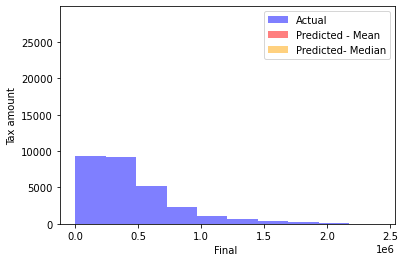

In [29]:
# plot to visualize actual vs predicted. 
plt.hist(predictions_tr.actual_tr, color='blue', alpha=.5, label="Actual")
plt.hist(predictions_tr.baseline_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted - Mean")
plt.hist(predictions_tr.baseline_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted- Median")
plt.xlabel("Final ")
plt.ylabel("Tax amount")
plt.legend()
plt.show()

In [ ]:
#based on the scale of the x=axis, i believe i cant see the predictions. Perhaps i need more  outlier filterin


In [30]:
# Next:


LinearRegression (OLS)

    Fit the model using X_train_scaled and the labels from y_train.

    Predict final grade for students in training sample using our model (lm).

    Evaluate using RMSE

    Repeat predictions and evaluation for validation.

    Compare RMSE train vs. validation. Overfitting? 
        -Does not appeare to be overfitting significantly


In [31]:
x_tr_s.info() #note: its a df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28476 entries, 7613 to 45179
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bed        28476 non-null  float64
 1   bath       28476 non-null  float64
 2   sqft       28476 non-null  float64
 3   yearbuilt  28476 non-null  float64
 4   zip        28476 non-null  float64
dtypes: float64(5)
memory usage: 1.3 MB


In [32]:
y_tr_s.info() #note: its a series

<class 'pandas.core.series.Series'>
Int64Index: 28476 entries, 7613 to 45179
Series name: tax_value
Non-Null Count  Dtype  
--------------  -----  
28476 non-null  float64
dtypes: float64(1)
memory usage: 444.9 KB


In [33]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model ONLY to our training data.  

lm.fit(x_tr_s, y_tr_s)

# predict train
y_trslm = lm.predict(x_tr_s)

# evaluate: rmse
rmse_train = mean_squared_error(y_tr_s, y_trslm)**(1/2)

# predict validate
y_valslm = lm.predict(x_val_s)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val_s, y_valslm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  293425.83044821577 
Validation/Out-of-Sample:  295061.43229865615


In [34]:
#Next:

LassoLars

    Fit the model using X_train_scaled and the labels from y_train.

    Predict final grade for students in training sample using our model (lars).

    Evaluate using RMSE

    Repeat predictions and evaluation for validation.

    Compare RMSE train vs. validation. Overfitting?
    
        -Does note appear to be overfitting

In [35]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model ONLY to our training data.  

lars.fit(x_tr_s, y_tr_s)

# predict train
y_tr_s_lars = lars.predict(x_tr_s)

# evaluate: rmse
rmse_train = mean_squared_error(y_tr_s, y_tr_s_lars)**(1/2)

# predict validate
y_val_s_lars = lars.predict(x_val_s)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val_s, y_val_s_lars)**(1/2)

print("RMSE for OLS using Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using Lars
Training/In-Sample:  293426.335231511 
Validation/Out-of-Sample:  295054.8464162155


In [36]:
# Next:

TweedieRegressor (GLM)

    Fit the model using X_train_scaled and the labels from y_train.

    Predict final grade for students in training sample using our model (glm).

    Evaluate using RMSE

    Repeat predictions and evaluation for validation.

    Compare RMSE train vs. validation. Overfitting?

         -Does note appear to be overfitting

In [38]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model ONLY to our training data.  

glm.fit(x_tr_s, y_tr_s)

# predict train
y_tr_s_glm = glm.predict(x_tr_s)

# evaluate: rmse
rmse_train = mean_squared_error(y_tr_s, y_tr_s_glm)**(1/2)

# predict validate
y_val_s_glm = glm.predict(x_val_s)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val_s, y_val_s_glm)**(1/2)

print("RMSE for OLS using GLM\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using GLM
Training/In-Sample:  366589.98598429695 
Validation/Out-of-Sample:  364247.55999770784


In [39]:
# Next:

Polynomial Regression

Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()

    Create the new features, based on value indicated for degree for train, validate & test.

    Fit the Linear Regression model

    Predict using the transformed (squared or cubed, e.g.) features

    Evaluate using RMSE

    Repeat predictions and evaluation for validation.

    Compare RMSE train vs. validation. Overfitting?


### Note:
You have to transform, remember, polynomial of higher power is going to create A LOT of new columns (coefficient for x1, x2, x1x2, x1**2, x2**2, etc. Those columns dont exist in the original dataset.

also note:
pick your data shape
1: line
2: curve
3: s
> 3: probably overfitting

(array([9339., 9175., 5167., 2350., 1032.,  614.,  401.,  254.,  121.,
          23.]),
 array([1.0000000e+03, 2.4281720e+05, 4.8463440e+05, 7.2645160e+05,
        9.6826880e+05, 1.2100860e+06, 1.4519032e+06, 1.6937204e+06,
        1.9355376e+06, 2.1773548e+06, 2.4191720e+06]),
 <BarContainer object of 10 artists>)

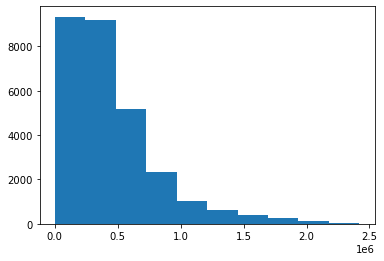

In [40]:
plt.hist(y_tr_s)

I think the rate of change of the slope is significant, and therfore it is not a straight line. I also don't think it is an s, so I am going to pick 2

In [41]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
x_tr_s_deg2 = pf.fit_transform(x_tr_s)

# transform X_validate_scaled & X_test_scaled
x_val_s_deg2 = pf.transform(x_val_s)
x_test_s_deg2 = pf.transform(x_test_s)


You have to transform, remember, polynomial of higher power is going to create A LOT of new columns (coefficient for x1, x2, x1x2, x1**2, x2**2, etc. Those columns dont exist in the original dataset.

In [42]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(x_tr_s_deg2, y_tr_s)

# predict train
y_trs_deg2 = lm2.predict(x_tr_s_deg2)

# evaluate: rmse
rmse_train = mean_squared_error(y_tr_s, y_trs_deg2)**(1/2)

# predict validate
y_vals_deg2 = lm2.predict(x_val_s_deg2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val_s, y_vals_deg2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  289702.261425894 
Validation/Out-of-Sample:  291784.4135773051


In [ ]:
#Next

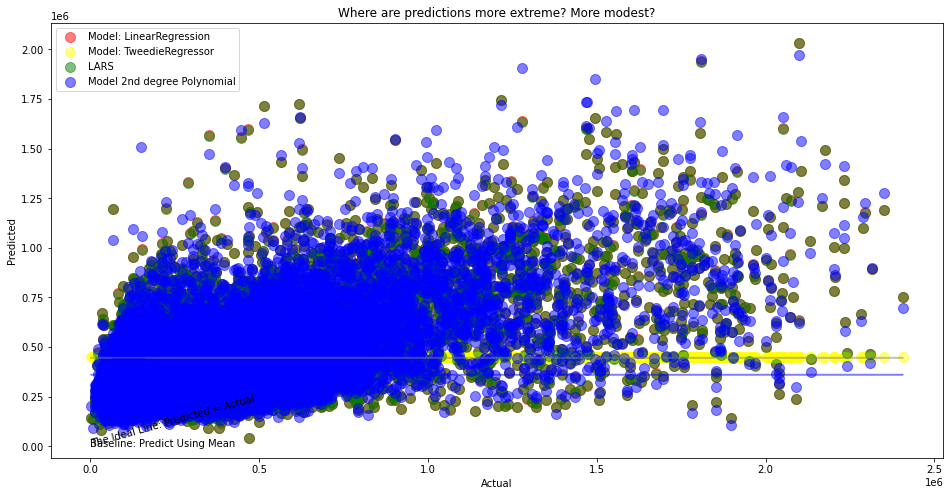

In [46]:
# curriculum updated with my lables
plt.figure(figsize=(16,8))
plt.plot(y_val_s, predictions_val.baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_val_s, predictions_val.baseline_median, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_val_s, y_valslm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_val_s, y_val_s_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_val_s, y_val_s_lars, 
            alpha=.5, color="green", s=100, label="LARS")
plt.scatter(y_val_s, y_vals_deg2, 
            alpha=.5, color="blue", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


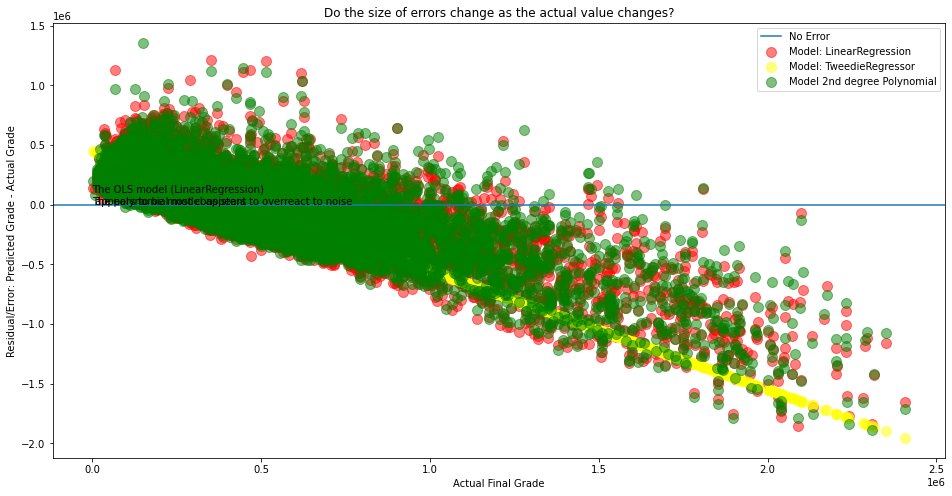

In [47]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_val_s, y_valslm-y_val_s, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_val_s, y_val_s_glm-y_val_s, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_val_s, y_vals_deg2-y_val_s, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Residual/Error: Predicted Grade - Actual Grade")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

In [ ]:
#for me, 2 degree polynomial is the best

In [ ]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
x_tr_s_deg2 = pf.fit_transform(x_tr_s)

# transform X_test_scaled
x_test_s_deg2 = pf.transform(x_test_s)


In [48]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(x_tr_s_deg2, y_tr_s)

# predict test
y_test_deg2 = lm2.predict(x_test_s_deg2)

# evaluate: rmse
rmse_train = mean_squared_error(y_test_s, y_test_deg2)**(1/2)


print("RMSE for Polynomial Model, degrees=2\nTest/In-Sample: ", rmse_train)


RMSE for Polynomial Model, degrees=2
Test/In-Sample:  288688.5671619762
